In [2]:
import pandas as pd
from IPython.core.display import display, HTML
from sklearn.naive_bayes import MultinomialNB
display(HTML("<style>.container { width:80% !important; }</style>"))
pd.set_option('display.max_colwidth', -1)

In [3]:
df=pd.read_csv('fake_or_real_news.csv')

In [4]:
df.head()

Unnamed: 0  \
0  8476         
1  10294        
2  3608         
3  10142        
4  875          

                                                                                   title  \
0  You Can Smell Hillary’s Fear                                                            
1  Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO)   
2  Kerry to go to Paris in gesture of sympathy                                             
3  Bernie supporters on Twitter erupt in anger against the DNC: 'We tried to warn you!'    
4  The Battle of New York: Why This Primary Matters                                        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [5]:
df.count()

Unnamed: 0    6335
title         6335
text          6335
label         6335
dtype: int64

In [6]:
 fake_set = df.loc[df['label'] == 'FAKE']
#fake_set = df.loc[df['label']]
 real_set = df.loc[df['label'] == 'REAL']
#real_set = df.loc[df['label']]
print(fake_set.count())
print(real_set.count())

Unnamed: 0    3164
title         3164
text          3164
label         3164
dtype: int64
Unnamed: 0    3171
title         3171
text          3171
label         3171
dtype: int64


In [7]:
train_set = pd.concat([fake_set[0:2199],real_set[0:2199]])
test_set = pd.concat([fake_set[2200:],real_set[2200:]])
print(train_set.head())

   Unnamed: 0  \
0  8476         
1  10294        
3  10142        
5  6903         
6  7341         

                                                                                   title  \
0  You Can Smell Hillary’s Fear                                                            
1  Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO)   
3  Bernie supporters on Twitter erupt in anger against the DNC: 'We tried to warn you!'    
5  Tehran, USA                                                                             
6  Girl Horrified At What She Watches Boyfriend Do After He Left FaceTime On               

                                                                                                                                                                                                                                                                                                                                                        

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
tfidf_vectorizer = TfidfVectorizer( max_features=2000000, stop_words='english', min_df=0.002, max_df=0.5, 
                                   use_idf=True, ngram_range=(1,3))

In [9]:
from sklearn.feature_selection import SelectKBest, chi2
tv = tfidf_vectorizer.fit(train_set['text'])
%time train_tfidf_matrix = tv.transform(train_set['text'])
ch2 = SelectKBest(chi2, k='all')
train_set_selected = ch2.fit_transform(train_tfidf_matrix, train_set['label'])

Wall time: 8.45 s


In [10]:
%time model1 = MultinomialNB().fit(train_tfidf_matrix, train_set['label'])
%time model2 = MultinomialNB().fit(train_set_selected, train_set['label'])

Wall time: 46.9 ms
Wall time: 31.2 ms


In [11]:
test_tfidf_matrix = tv.transform(test_set['text'])
test_set_selected = ch2.transform(test_tfidf_matrix)

In [12]:
all_predictions1 = model1.predict(test_tfidf_matrix)
all_predictions2 = model2.predict(test_set_selected)

In [13]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print('accuracy of model1 {}'.format(accuracy_score(test_set['label'], all_predictions1)))
print('accuracy of model2 {}'.format(accuracy_score(test_set['label'], all_predictions2)))


accuracy of model1 0.9049095607235143
accuracy of model2 0.9049095607235143


             precision    recall  f1-score   support

       FAKE       0.92      0.88      0.90       964
       REAL       0.89      0.92      0.91       971

avg / total       0.91      0.90      0.90      1935



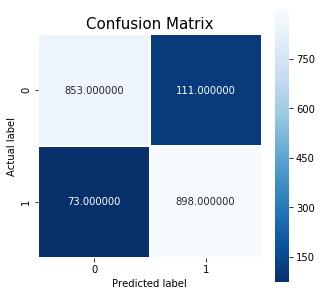

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_set['label'],all_predictions1)
plt.show()
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidth=.5, square = True, cmap = 'Blues_r',fmt='f');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);

from sklearn.metrics import classification_report
report = classification_report(test_set['label'],all_predictions1)
print(report)


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer( max_features=200000, stop_words='english', min_df=0.002, max_df=0.5, ngram_range=(1,3))
count_vectorizer = count_vectorizer.fit(train_set['text'])
%time train_count_matrix = count_vectorizer.transform(train_set['text'])

Wall time: 8.45 s


In [16]:
from sklearn.feature_selection import SelectKBest, chi2
top = SelectKBest(chi2, k='all')
train_set_selected2 = top.fit_transform(train_count_matrix, train_set['label'])

In [17]:
%time model2 = MultinomialNB().fit(train_set_selected2, train_set['label'])

Wall time: 46.9 ms


In [19]:
test_count_matrix = count_vectorizer.transform(test_set['text'])
test_set_selected2 = top.transform(test_count_matrix)
all_predictions2 = model2.predict(test_set_selected2)

In [20]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print('accuracy {}'.format(accuracy_score(test_set['label'], all_predictions2)))
print('confusion matrix\n {}'.format(confusion_matrix(test_set['label'], all_predictions2)))
print('(row=expected, col=predicted)')

accuracy 0.8997416020671835
confusion matrix
 [[863 101]
 [ 93 878]]
(row=expected, col=predicted)


In [ ]:
plt.matshow(confusion_matrix(test_set['label'], all_predictions2), cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

             precision    recall  f1-score   support

       FAKE       0.90      0.90      0.90       964
       REAL       0.90      0.90      0.90       971

avg / total       0.90      0.90      0.90      1935



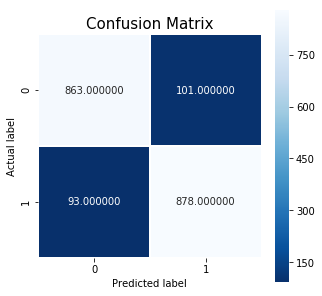

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_set['label'],all_predictions2)
plt.show()
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidth=.5, square = True, cmap = 'Blues_r',fmt='f');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);

from sklearn.metrics import classification_report
report = classification_report(test_set['label'],all_predictions2)
print(report)
